In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy import sparse
from sys import getsizeof
import cv2
import numpy as np
import os
import datetime as dt
import json
import sys

data = {}
processed = {}
coords = {
    "limits_4326": {
        "xmin":-80.4,
        "xmax": -60.6,
        "ymin": 44.6,
        "ymax": 52.6
    }
}

target_limit =  "limits_4326" #"limits_testing_9_chunks"
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

chunksDirectory = "drive/MyDrive/Wildfire Research Project/Wildfires Data/Chunks"

In [ ]:
DataOrder = {
    4011: "Thunder", # 0 to 4010
    13433: "Human", # 4011 to 13432
    28433: "No-Fire", # 13433 to 28432
    43433: "No-Fire-Data" # 28433 to 43432
}

DataIntervals = {
    "Thunder": (0, 4010),
    "Human": (4011, 13432),
    "No-Fire": (13433, 28432),
    "No-Fire-Data": (28433, 43432)
}

DataTypeToOutput = {
    "Thunder": 1,
    "Human": 1,
    "No-Fire": 0,
    "No-Fire-Data": 0
}

In [ ]:
Training = {}
Training["Thunder"] = np.load("drive/MyDrive/Wildfire Research Project/Wildfires Data/Foudre.npy")
Training["Human"] = np.load("drive/MyDrive/Wildfire Research Project/Wildfires Data/Humaine.npy")
Training["No-Fire"] = np.load("drive/MyDrive/Wildfire Research Project/Wildfires Data/Sans-Feu.npy")
Training["Fire"] = np.concatenate((Training["Thunder"], Training["Human"]))

In [ ]:
shapefile_datasets = []
directory = "drive/MyDrive/Wildfire Research Project/Wildfires Data/Training"
secondDirectory = "drive/MyDrive/Wildfire Research Project/Wildfires Data/Training Base"

for filename in os.listdir(directory):
    print("Reading from ",filename)
    filedir = os.path.join(directory, filename)
    if (filename == "fires" or filename == "Ignore"):
        continue

    shapefile_datasets.append(sparse.load_npz(filedir).tocsc())

for filename in os.listdir(secondDirectory):
    print("Reading from ",filename)
    filedir = os.path.join(secondDirectory, filename)
    if (filename == "fires" or filename == "Ignore"):
        continue

    shapefile_datasets.append(sparse.load_npz(filedir).tocsc())

Reading from  Hydrographie.npz
Reading from  Route.npz
Reading from  Lignes.npz
Reading from  Foret Feuillu.npz
Reading from  Foret Melange.npz
Reading from  Foret Resineux.npz


## Utils

In [ ]:
def boundsToMat(bounds, datashape):
  diffx = xmax-xmin
  diffy = ymax-ymin
  width = datashape[1]
  height = datashape[0]
  return (int(((bounds[0]-xmin)/diffx)*width),
   int(((bounds[1]-xmin)/diffx)*width),
   int(((bounds[2]-ymin)/diffy)*height),
   int(((bounds[3]-ymin)/diffy)*height))

# Preprocessing Training Data Base Model

In [ ]:
titles = [
    "Hydrography",
    "Roads",
    "Transmission Lines",
    "Hardwood Forest",
    "Mixed Forest",
    "Softwood Forest"
]

In [ ]:
def getTrainingData(filename, chunkN):
  trainInput = np.array([])
  trainOutput = [0]

  dataType = ""

  for dataType in DataIntervals.keys():
    if (DataIntervals[dataType][0] <= chunkN and DataIntervals[dataType][1] >= chunkN):
      trainOutput = [DataTypeToOutput[dataType]]
      break

  bounds = Training[dataType][chunkN-DataIntervals[dataType][0]]
  for dataset in shapefile_datasets:
    minx, maxx, miny, maxy = boundsToMat(bounds, dataset.shape)
    data_raw = dataset[miny:maxy, minx:maxx].todense()
    plt.show()
    if (data_raw.size == 0):
      print("Empty List")
      trainInput = np.concatenate((trainInput, np.zeros(12*12))) # We'll see about this maybe discard the data too
      continue
    data_process = cv2.resize(data_raw, dsize=(12, 12), interpolation=cv2.INTER_CUBIC).ravel()
    trainInput = np.concatenate((trainInput, data_process))

  print(trainInput.shape)
  # print(trainOutput)
  print("OK")
  # print(sys.getsizeof(trainInput))
  # print(sys.getsizeof(trainOutput))
  return trainInput, trainOutput, dataType

In [ ]:
def showTrainingData(filename, chunkN):
  trainInput = np.array([])
  trainOutput = [0]

  dataType = ""

  for dataType in DataIntervals.keys():
    if (DataIntervals[dataType][0] <= chunkN and DataIntervals[dataType][1] >= chunkN):
      trainOutput = [DataTypeToOutput[dataType]]
      break

  bounds = Training[dataType][chunkN-DataIntervals[dataType][0]]
  curIdx = 0
  for dataset in shapefile_datasets:
    minx, maxx, miny, maxy = boundsToMat(bounds, dataset.shape)
    data_raw = dataset[miny:maxy, minx:maxx].todense()
    plt.imshow(data_raw)
    plt.title(titles[curIdx])
    plt.show()
    # if (data_raw.size == 0):
    #   print("Empty List")
    #   trainInput = np.concatenate((trainInput, np.zeros(12*12))) # We'll see about this maybe discard the data too
    #   continue
    # data_process = cv2.resize(data_raw, dsize=(12, 12), interpolation=cv2.INTER_CUBIC).ravel()
    # trainInput = np.concatenate((trainInput, data_process))
    curIdx += 1

  print(trainInput.shape)
  # print(trainOutput)
  print("OK")
  # print(sys.getsizeof(trainInput))
  # print(sys.getsizeof(trainOutput))
  return trainInput, trainOutput, dataType

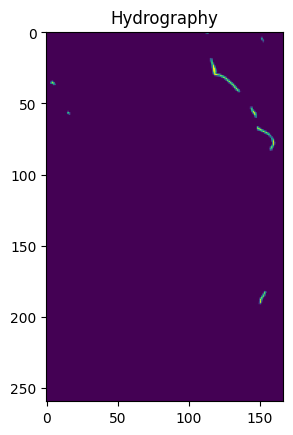

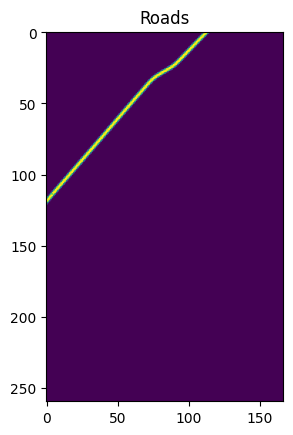

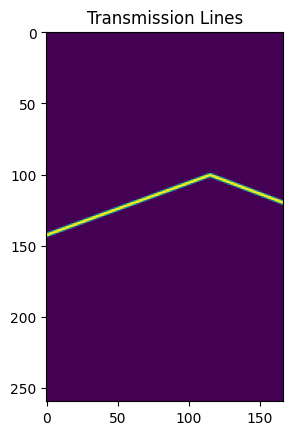

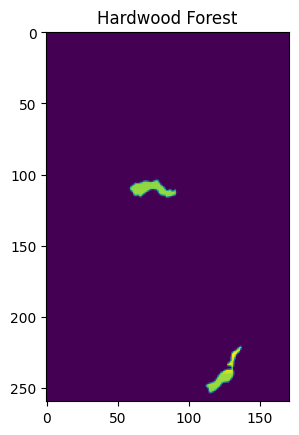

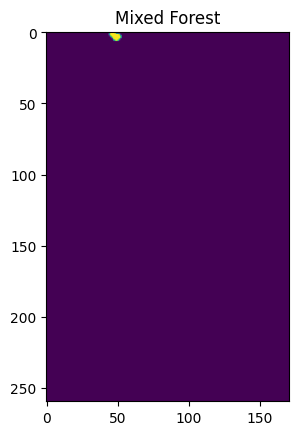

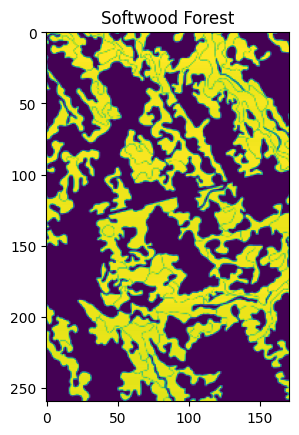

(0,)
OK


In [ ]:
trainInput, trainOutput, dataType = showTrainingData(filename, 0)

In [ ]:
trainX = []
trainY = []

In [ ]:
trainX = []
trainY = []

index = 0

for chunkN in range(28433):
  print(chunkN)

  trainInput, trainOutput, dataType = getTrainingData(filename, chunkN)
  if (trainInput is None):
    continue

  trainX.append(trainInput)
  trainY.append(trainOutput)

Streaming output truncated to the last 5000 lines.
23433
23434
23435
23436
23437
23438
23439
23440
23441
23442
23443
23444
23445
23446
23447
23448
23449
23450
23451
23452
23453
23454
23455
23456
23457
23458
23459
23460
23461
23462
23463
23464
23465
23466
23467
23468
23469
23470
23471
23472
23473
23474
23475
23476
23477
23478
23479
23480
23481
23482
23483
23484
23485
23486
23487
23488
23489
23490
23491
23492
23493
23494
23495
23496
23497
23498
23499
23500
23501
23502
23503
23504
23505
23506
23507
23508
23509
23510
23511
23512
23513
23514
23515
23516
23517
23518
23519
23520
23521
23522
23523
23524
23525
23526
23527
23528
23529
23530
23531
23532
23533
23534
23535
23536
23537
23538
23539
23540
23541
23542
23543
23544
23545
23546
23547
23548
23549
23550
23551
23552
23553
23554
23555
23556
23557
23558
23559
23560
23561
23562
23563
23564
23565
23566
23567
23568
23569
23570
23571
23572
23573
23574
23575
23576
23577
23578
23579
23580
23581
23582
23583
23584
23585
23586
23587
23588
23589
23590
2

In [ ]:
np.save("drive/MyDrive/Wildfire Research Project/Wildfires Data/trainX_base", trainX)
np.save( "drive/MyDrive/Wildfire Research Project/Wildfires Data/trainY_base", trainY)

In [ ]:
len(trainX), len(trainY)

(28433, 28433)